In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from keys import user_name, password, host, data_base

In [2]:
# Create Engine and Pass in PostgreSQL Connection
engine = create_engine(f'postgresql://{user_name}:{password}@{host}/{data_base}')
connection = engine.connect()

In [3]:
# get salary and title tables from db
salaries = pd.read_sql("SELECT * FROM salaries", connection)
titles = pd.read_sql("SELECT * FROM titles", connection)

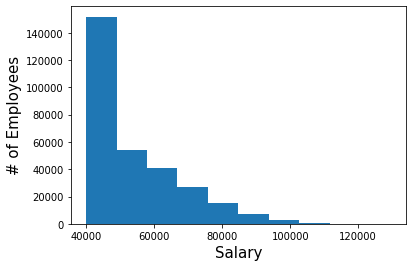

In [4]:
#create histogram of salaries
salaries['salary'].plot(kind='hist')
plt.xlabel("Salary",fontsize=15)
plt.ylabel("# of Employees",fontsize=15)
plt.show()

In [5]:
# pull list employees' numbers and their corresponding titles and salaries and create db
employees_title_salary = pd.read_sql("SELECT e.emp_no, t.title, s.salary \
                         FROM employees e \
                         RIGHT JOIN titles t\
                         ON (e.emp_no = t.emp_no)\
                         RIGHT JOIN salaries s\
                         ON (t.emp_no = s.emp_no)", connection)
employees_title_salary.head()

,emp_no,title,salary
0,10001,Senior Engineer,60117
1,10005,Senior Staff,78228
2,10005,Staff,78228
3,10010,Engineer,72488
4,10011,Staff,42365


In [6]:
# Create a DataFrame with the average salary for each title. 
avg_salary_title = pd.DataFrame(employees_title_salary.groupby(["title"]).mean()["salary"]).reset_index()

In [7]:
avg_salary_title.head()

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614


Text(0, 0.5, 'Average salaries')

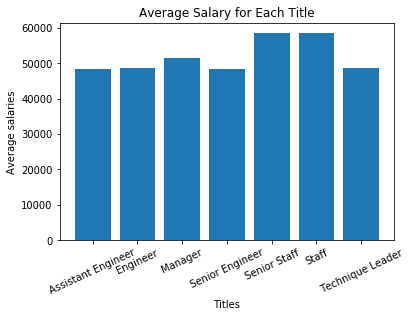

In [9]:
# Use Matplotlib to create a bar chart 
plt.bar(np.arange(len(avg_salary_title)), avg_salary_title.salary, align = "center")
plt.xticks([lable for lable in np.arange(len(avg_salary_title))], avg_salary_title["title"],
           rotation = 25)
plt.title("Average Salary for Each Title")
plt.xlabel("Titles")
plt.ylabel("Average salaries")